In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np 
import os 
import pandas as pd 
from typing import Tuple, List
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [2]:
nRowsRead = None # specify 'None' if want to read whole file

df = pd.read_csv('../input/model_2015_ST4000DM000.csv', delimiter=',', nrows = nRowsRead)
directory = '../input/'

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df_ = pd.read_csv(file_path, delimiter=',', nrows = nRowsRead)
        df = pd.concat([df,df_[df_['failure'] == 1]],sort = False)

# df.dataframeName = 'model_2015_ST4000DM000.csv'
# df_ = pd.read_csv('../input/model_2016_ST4000DM000.csv', delimiter=',', nrows = nRowsRead)
# df_.dataframeName = 'model_2016_ST4000DM000.csv'
# df = pd.concat([df,df_],sort = False)
# df_ = pd.read_csv('../input/model_2017_ST4000DM000.csv', delimiter=',', nrows = nRowsRead)
# df_.dataframeName = 'model_2017_ST4000DM000.csv'
# df = pd.concat([df,df_],sort = False)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1372813 rows and 105 columns


In [3]:
df.head(5)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_177_normalized,smart_177_raw,smart_179_normalized,smart_179_raw,smart_181_normalized,smart_181_raw,smart_182_normalized,smart_182_raw,smart_235_normalized,smart_235_raw
0,2015-01-01,Z300YN6R,ST4000DM000,4000787030016,0,117.0,134283496.0,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,W300T09N,ST4000DM000,4000787030016,0,120.0,235812736.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,Z3025923,ST4000DM000,4000787030016,1,117.0,159417104.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,Z300GPJ7,ST4000DM000,4000787030016,0,110.0,25333728.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,Z300VALY,ST4000DM000,4000787030016,0,117.0,139107936.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_177_normalized,smart_177_raw,smart_179_normalized,smart_179_raw,smart_181_normalized,smart_181_raw,smart_182_normalized,smart_182_raw,smart_235_normalized,smart_235_raw
count,1.372813e+06,1.372813e+06,1.372810e+06,1.372810e+06,0.0,0.0,1.372810e+06,1372810.0,1.372810e+06,1.372810e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.000781e+12,1.251882e-01,1.152630e+02,1.211711e+08,NaN,NaN,9.461283e+01,0.0,1.000000e+02,8.149295e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.828971e+09,3.309323e-01,3.861582e+00,7.038826e+07,NaN,NaN,2.961386e+00,0.0,1.706964e-03,1.093317e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.000000e+00,0.000000e+00,8.600000e+01,0.000000e+00,NaN,NaN,9.100000e+01,0.0,9.900000e+01,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.000787e+12,0.000000e+00,1.140000e+02,5.952811e+07,NaN,NaN,9.200000e+01,0.0,1.000000e+02,3.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000787e+12,0.000000e+00,1.170000e+02,1.203359e+08,NaN,NaN,9.400000e+01,0.0,1.000000e+02,6.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000787e+12,0.000000e+00,1.180000e+02,1.822052e+08,NaN,NaN,9.700000e+01,0.0,1.000000e+02,1.100000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.000787e+12,1.000000e+00,1.200000e+02,2.441401e+08,NaN,NaN,1.000000e+02,0.0,1.000000e+02,1.173000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372813 entries, 0 to 178284
Columns: 105 entries, date to smart_235_raw
dtypes: float64(100), int64(2), object(3)
memory usage: 1.1+ GB


In [6]:
df_cleaned = df.dropna(axis=1, how='all')
df_cleaned = df_cleaned.drop(columns=['capacity_bytes'])
df_cleaned = df_cleaned.dropna(axis = 0, how = 'all')
df_cleaned.drop(list(df_cleaned.filter(regex = 'normalized')), axis = 1, inplace = True)
# df_cleaned = df_cleaned[~df_cleaned['serial_number'].str.startswith('Z')]
df_cleaned = df_cleaned[[i for i in df_cleaned if df_cleaned[i].nunique()>1]]
df_cleaned.describe()

,failure,smart_1_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,smart_183_raw,smart_184_raw,smart_187_raw,...,smart_190_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
count,1.372813e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,...,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06
mean,1.251882e-01,1.211711e+08,8.149295e+00,1.625583e+01,3.892146e+10,9.034166e+03,9.170508e+00,2.335094e+00,1.172049e-02,2.060890e-01,...,2.512631e+01,2.739890e+00,2.100982e+04,2.512631e+01,9.973296e-01,9.973296e-01,4.291210e+00,5.261395e+13,1.764998e+10,9.354387e+10
std,3.309323e-01,7.038826e+07,1.093317e+01,4.515019e+02,2.606988e+12,6.452959e+03,1.535826e+02,9.179723e+01,3.151323e-01,7.590266e+00,...,4.713516e+00,9.444106e+00,3.331662e+04,4.713516e+00,4.054757e+01,4.054757e+01,1.220769e+02,8.417890e+13,6.870094e+09,8.101820e+10
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.400000e+01,0.000000e+00,2.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,1.641000e+03
25%,0.000000e+00,5.952811e+07,3.000000e+00,0.000000e+00,1.104041e+08,3.177000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.200000e+01,0.000000e+00,3.237000e+03,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.077000e+03,1.346768e+10,8.998960e+09
50%,0.000000e+00,1.203359e+08,6.000000e+00,0.000000e+00,2.310054e+08,8.002000e+03,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.500000e+01,1.000000e+00,1.266500e+04,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,8.510000e+03,1.787112e+10,9.288863e+10
75%,0.000000e+00,1.822052e+08,1.100000e+01,0.000000e+00,4.696381e+08,1.406800e+04,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,2.800000e+01,3.000000e+00,2.634700e+04,2.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.345849e+13,2.227402e+10,1.427875e+11
max,1.000000e+00,2.441401e+08,1.173000e+03,6.472000e+04,2.814717e+14,4.128400e+04,1.641500e+04,6.032000e+03,4.000000e+01,5.880000e+03,...,1.410000e+02,1.167000e+03,6.474770e+05,1.410000e+02,1.566400e+04,1.566400e+04,5.415000e+03,2.814707e+14,5.855064e+10,6.463693e+11


In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372813 entries, 0 to 178284
Data columns (total 24 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   date           1372813 non-null  object 
 1   serial_number  1372813 non-null  object 
 2   failure        1372813 non-null  int64  
 3   smart_1_raw    1372810 non-null  float64
 4   smart_4_raw    1372810 non-null  float64
 5   smart_5_raw    1372810 non-null  float64
 6   smart_7_raw    1372810 non-null  float64
 7   smart_9_raw    1372810 non-null  float64
 8   smart_12_raw   1372810 non-null  float64
 9   smart_183_raw  1372810 non-null  float64
 10  smart_184_raw  1372810 non-null  float64
 11  smart_187_raw  1372810 non-null  float64
 12  smart_188_raw  1372810 non-null  float64
 13  smart_189_raw  1372810 non-null  float64
 14  smart_190_raw  1372810 non-null  float64
 15  smart_192_raw  1372810 non-null  float64
 16  smart_193_raw  1372810 non-null  float64
 17  smart_194_raw 

In [8]:
df_cleaned.head()

,date,serial_number,failure,smart_1_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,smart_183_raw,...,smart_190_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,2015-01-01,Z300YN6R,0,134283496.0,3.0,0.0,74635687.0,1641.0,3.0,1.0,...,22.0,2.0,2443.0,22.0,0.0,0.0,0.0,1.624000e+03,8.441971e+09,2.469779e+10
1,2015-01-01,W300T09N,0,235812736.0,14.0,0.0,138184468.0,3534.0,14.0,1.0,...,27.0,2.0,115041.0,27.0,0.0,0.0,0.0,2.311122e+13,1.025090e+10,2.269857e+10
2,2015-01-01,Z3025923,1,159417104.0,1.0,0.0,86152902.0,1350.0,1.0,0.0,...,21.0,0.0,17.0,21.0,0.0,0.0,0.0,1.350000e+03,8.734935e+09,2.309538e+10
3,2015-01-01,Z300GPJ7,0,25333728.0,10.0,0.0,131298458.0,12845.0,10.0,0.0,...,29.0,5.0,13967.0,29.0,0.0,0.0,0.0,1.436581e+14,2.187359e+10,1.156925e+11
4,2015-01-01,Z300VALY,0,139107936.0,4.0,0.0,691675817.0,9366.0,3.0,0.0,...,27.0,1.0,6163.0,27.0,0.0,0.0,0.0,1.703169e+14,1.840603e+10,4.845404e+10


In [9]:
df_cleaned = df_cleaned[[i for i in df_cleaned if df_cleaned[i].nunique()>1]]
df_cleaned = df_cleaned.dropna(axis = 0, how = 'any')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372810 entries, 0 to 178284
Data columns (total 24 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   date           1372810 non-null  object 
 1   serial_number  1372810 non-null  object 
 2   failure        1372810 non-null  int64  
 3   smart_1_raw    1372810 non-null  float64
 4   smart_4_raw    1372810 non-null  float64
 5   smart_5_raw    1372810 non-null  float64
 6   smart_7_raw    1372810 non-null  float64
 7   smart_9_raw    1372810 non-null  float64
 8   smart_12_raw   1372810 non-null  float64
 9   smart_183_raw  1372810 non-null  float64
 10  smart_184_raw  1372810 non-null  float64
 11  smart_187_raw  1372810 non-null  float64
 12  smart_188_raw  1372810 non-null  float64
 13  smart_189_raw  1372810 non-null  float64
 14  smart_190_raw  1372810 non-null  float64
 15  smart_192_raw  1372810 non-null  float64
 16  smart_193_raw  1372810 non-null  float64
 17  smart_194_raw 

In [10]:
# columns_to_cluster = df_cleaned.loc[:, 'smart_1_raw':]
for key in df_cleaned.loc[:,'smart_1_raw':].columns:
    num_clusters = 10
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
    cluster_labels = kmeans.fit_predict(df_cleaned[key].to_numpy().reshape(-1,1))
    df_cleaned[key] = cluster_labels

    #  df_cleaned[key] = pd.cut(x = list(df_cleaned[key]), bins = 10, labels = [0,1,2,3,4,5,6,7,8,9])

In [128]:
group = df_cleaned.groupby('serial_number').filter(lambda x : x['failure'].count() >= 120).groupby('serial_number')
# group = df_cleaned.groupby('serial_number')
group.size()

serial_number
S3000FZ5    121
S3000QAP    121
S3002DLG    120
S3002HH0    121
S30034E6    121
           ... 
Z305KVLL    120
Z305KW22    120
Z305P0CK    120
Z305PFNG    120
Z305Q0J8    120
Length: 9173, dtype: int64

In [129]:
failure_df = group.filter(lambda x : x['failure'].sum() > 0)
success_df = group.filter(lambda x : x['failure'].sum() <= 0)

In [130]:
def split_dataset(df: pd.DataFrame, test_size: int = None, train_size: int = None, key: str = 'serial_number')  -> Tuple[pd.DataFrame, pd.DataFrame]:
    keys_set = df[key].unique()
    if test_size == None or train_size == None:
        keys_train, keys_test = train_test_split(keys_set)
    else:
        keys_train, keys_test = train_test_split(keys_set,test_size = test_size, train_size = train_size)
    df_train, df_test = df[df[key].isin(keys_train)], df[df[key].isin(keys_test)]
    df_train = df_train.sort_values(by='date')
    df_test = df_test.sort_values(by='date')
    return df_train, df_test

In [131]:
def group_to_hmminput(df : pd.DataFrame) -> Tuple[dict[str,np.ndarray],List[int]]:
    df = df.sort_values(by = ['serial_number','date'])
    grouped = df.groupby('serial_number')
    sequence = dict(zip(df.loc[:,'smart_1_raw':].columns,[df[col].to_numpy(dtype = 'uint32').reshape(-1,1) for col in df.loc[:,'smart_1_raw':].columns]))
    lengths = list(grouped.size().values)
    return sequence, lengths

In [132]:
failure_train, failure_test = split_dataset(failure_df)
failure_train, failure_train_len = group_to_hmminput(failure_train)
failure_test, failure_test_len = group_to_hmminput(failure_test)

In [133]:
success_train, success_test = split_dataset(success_df,len(failure_test_len),len(failure_train_len))
success_train, success_train_len = group_to_hmminput(success_train)
success_test, success_test_len = group_to_hmminput(success_test)

In [265]:
model1 = {}
for attr in failure_train.keys():
    model1[attr] = hmm.CategoricalHMM(n_components = 5, n_features = 10, n_iter = 1)
    model1[attr].fit(failure_train[attr],failure_train_len)

In [266]:
model2 = {}
for attr in success_train.keys():
    model2[attr] = hmm.CategoricalHMM(n_components = 5, n_features = 10, n_iter = 1)
    # model2[attr].fit(success_train[attr][:sum(success_train_len[:len(failure_train_len)])], success_train_len[:len(failure_train_len)]) #Equal Dataset
    model2[attr].fit(success_train[attr],success_train_len) 

In [267]:
def model_save(model_dict : dict, model_type : str) -> None:
    save_path = f"../models/{model_type[0].upper() + model_type[1:]}"
    for attr_name, model in model_dict.items():
        filename = f"{save_path}/{attr_name}.pkl"
        with open(filename, "wb") as file:
            pickle.dump(model, file)

In [268]:
def split_concatenated_arrays(concatenated_dict : dict, lengths : List[int]):
    original_dict = {}
    for key,concatenated_list in concatenated_dict.items():
        original_arrays = []
        start = 0
        for length in lengths:
            end = start + length
            new_list = concatenated_list[start:end]
            original_arrays.append(new_list)
            start = end
        original_dict[key] = original_arrays
    return original_dict

In [269]:
failure_testset = split_concatenated_arrays(failure_test,failure_test_len)

In [270]:
success_testset = split_concatenated_arrays(success_test,success_test_len)

In [271]:
def loadmodels(type: str) -> dict:
    directory = '../models/' + type + '/'
    models = {}
    for filename in os.listdir(directory):
        if filename.endswith(".pkl"):
            file_path = os.path.join(directory, filename)
            with open(file_path, "rb") as file: 
                models[filename[:-4]] =  pickle.load(file)
    return models

In [272]:
def test_model(testset, lengths) -> List[int]:
    pred_label = []
    for i in range(len(lengths)):
        scores = {}
        for key in testset:
            scores[key] = model1[key].score(testset[key][i]) - model2[key].score(testset[key][i])
        if np.average(np.array(list(scores.values()))) > 0 :
            pred_label.append(1)
        else : 
            pred_label.append(0)
        # if abs(min(scores.values())) - max(scores.values()) > 10:
        #     pred_label.append(0)
        # else :
        #     pred_label.append(1)
    return pred_label


In [273]:
true_label = [1]*len(failure_test_len)+[0]*len(success_test_len)

In [274]:
pred_fail = test_model(failure_testset, failure_test_len)
pred_success = test_model(success_testset, success_test_len)
pred_label = pred_fail + pred_success

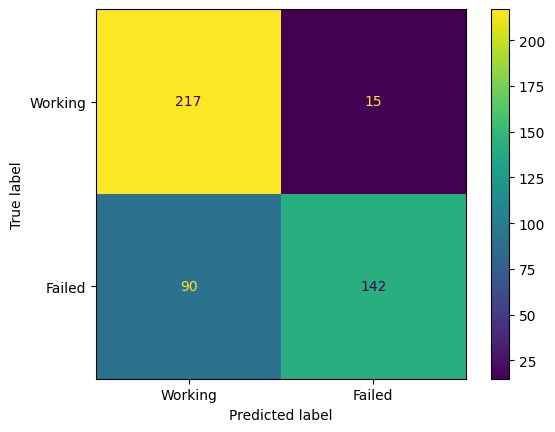

In [275]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
conf = confusion_matrix(true_label , pred_label)
ConfusionMatrixDisplay(
conf,display_labels = ['Working','Failed']
).plot()

In [276]:
print(classification_report(true_label , pred_label))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81       232
           1       0.90      0.61      0.73       232

    accuracy                           0.77       464
   macro avg       0.81      0.77      0.77       464
weighted avg       0.81      0.77      0.77       464

